### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [123]:
data = pd.read_csv('data/coupons.csv')

In [124]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [125]:
#Check for missing or problematic data
mop_data = data.isnull().sum()
mop_data

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [126]:
#Check data types
data_types = data.dtypes
data_types

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [127]:
#Display data statistics
data_stats = data.describe()
data_stats

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: title={'center': 'Missing or Problematic Data per Column'}, xlabel='Columns', ylabel='Missing or Problematic Data'>

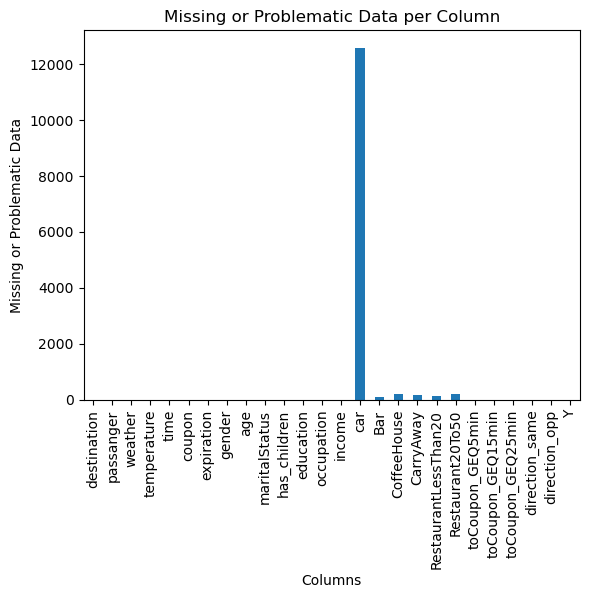

In [128]:
#Show missing values by bar plot
mop_plot = data.isnull().sum().plot(kind = 'bar')
plt.xlabel('Columns')
plt.ylabel('Missing or Problematic Data')
plt.title('Missing or Problematic Data per Column')
mop_plot

3. Decide what to do about your missing data -- drop, replace, other...

In [129]:
#Drop null rows for 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20-50'
data = data.dropna(subset = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50'])
drows = data.isnull().sum()
drows

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     11971
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [130]:
#Drop car column
data = data.drop(columns=['car'])
dcol = data.isnull().sum()
dcol

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [131]:
#Find total observations
tot_obsrv_prop = len(data)
tot_obsrv_prop

12079

In [132]:
#Find total accepted coupons
acc_coups = data['Y'].sum()
acc_coups

6877

In [133]:
#Find proportion
coup_prop = acc_coups / tot_obsrv_prop
coup_prop

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

In [134]:
#Find total coupons per coupon type
coup_count = data['coupon'].value_counts()
coup_count

Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: coupon, dtype: int64

Text(0.5, 1.0, 'Coupon Distribution by Type')

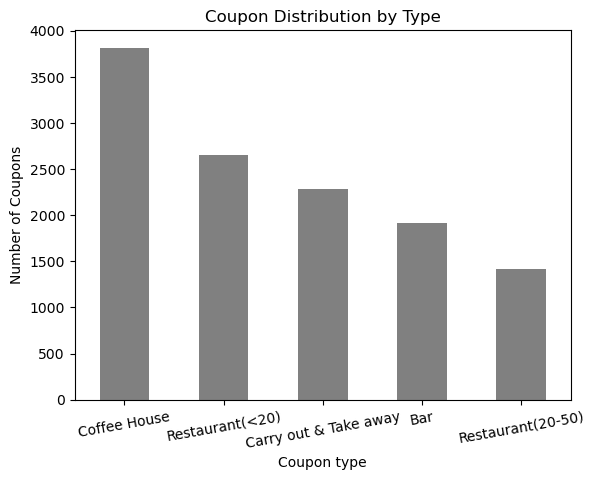

In [135]:
#Create a bar plot showing coupons per coupon type
coupon_type_plot = coup_count.plot(kind='bar', color = 'grey')
plt.xlabel('Coupon type')
plt.xticks(rotation = 10)
plt.ylabel('Number of Coupons')
plt.title('Coupon Distribution by Type')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Measurements of Temperature')

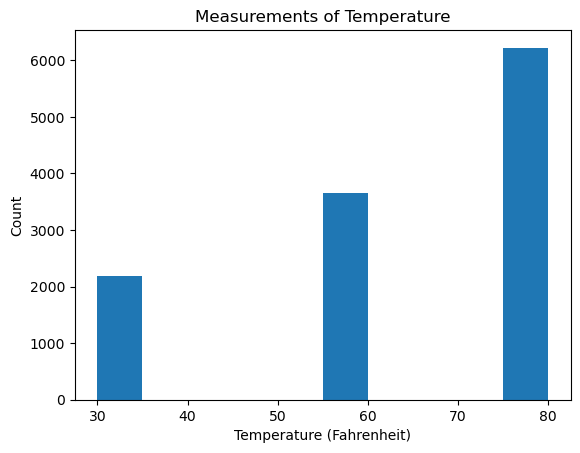

In [136]:
plt.hist(data['temperature'])
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Count')
plt.title('Measurements of Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [137]:
#Create a new DataFrame with just bar coupon data
BarCoups = data[data['coupon'] == 'Bar']
BarCoups

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [138]:
#Find the total number of bar coupons issued
TotBarCoups = len(BarCoups)
TotBarCoups

1913

In [139]:
#Find the total number of accepted and rejected bar coupons
AccBarCoups = BarCoups['Y'].sum()
RejBarCoups = TotBarCoups - AccBarCoups
AccBarCoups

788

In [140]:
#Calculate the proportion of accepted bar coupons
AccBarCoupProps = AccBarCoups/TotBarCoups
AccBarCoupProps

0.41191845269210664

Text(0.5, 1.0, 'Accepted vs Rejected Coupons')

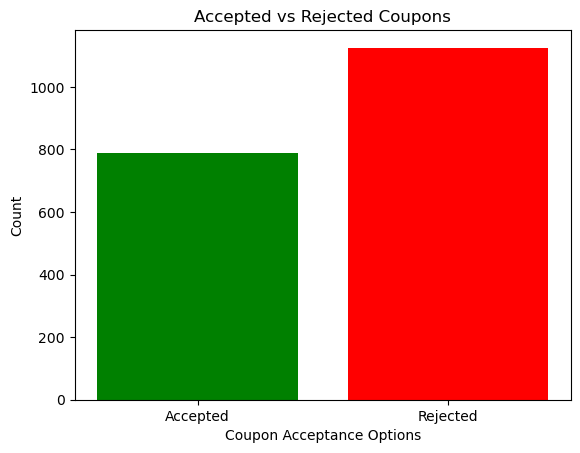

In [141]:
plt.bar(['Accepted', 'Rejected'], [AccBarCoups, RejBarCoups], color = ['green', 'red'])
plt.xlabel('Coupon Acceptance Options')
plt.ylabel('Count')
plt.title('Accepted vs Rejected Coupons')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [142]:
#Define the two groups of bar-goers
LessThan3 = BarCoups[BarCoups['Bar'].isin(['never', 'less1', '1~3'])]
MoreThan3 = BarCoups[BarCoups['Bar'].isin(['4~8', 'gt8'])]
LessThan3

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [143]:
#Calculate the acceptance rate for the group that goes fewer than 3 times
LT3AccRate = LessThan3['Y'].sum()/len(LessThan3)
LT3AccRate

0.37267441860465117

In [144]:
#Calculate the acceptance rate for the group that goes more than 3 times
MT3AccRate = MoreThan3['Y'].sum()/len(MoreThan3)
MT3AccRate

0.7616580310880829

Text(0.5, 1.0, 'Bar Coupon Acceptance Rate')

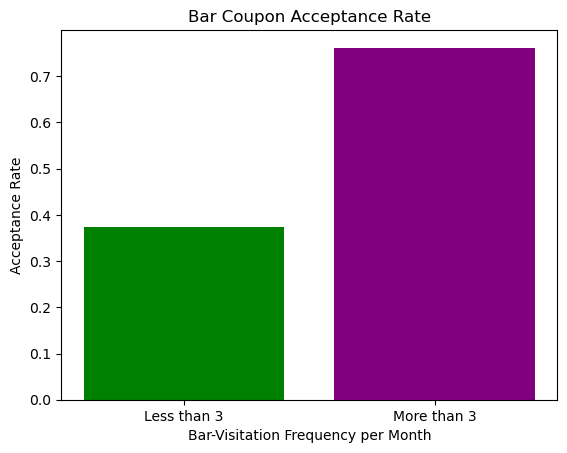

In [145]:
#Plot the acceptance rates defined by bar-visitation frequency
plt.bar(['Less than 3', 'More than 3'], [LT3AccRate, MT3AccRate], color = ['green', 'purple'])
plt.xlabel('Bar-Visitation Frequency per Month')
plt.ylabel('Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [157]:
#Convert age column from object to float
data['age'] = pd.to_numeric(data['age'])
data.dtypes

destination              object
passanger                object
weather                  object
temperature               int64
time                     object
coupon                   object
expiration               object
gender                   object
age                     float64
maritalStatus            object
has_children              int64
education                object
occupation               object
income                   object
Bar                      object
CoffeeHouse              object
CarryAway                object
RestaurantLessThan20     object
Restaurant20To50         object
toCoupon_GEQ5min          int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
direction_opp             int64
Y                         int64
dtype: object

In [158]:
#Define the two groups
DriversOver25MoreThanOnce = data[(data['Bar'].isin(['4~8', 'gt8', '1~3'])) & (data['age'] > 25)]
AllOthers = data[~((data['Bar'].isin(['4~8', 'gt8', '1~3'])) & (data['age'] > 25))]

In [159]:
#Calculate the acceptance rate for drivers who are over 25 and frequent the bar more than once
DO25MTOAccRate = DriversOver25MoreThanOnce['Y'].mean()
DO25MTOAccRate

0.6268656716417911

In [160]:
#Calculate the acceptance rate for all other bar goers
AOAccRate = AllOthers['Y'].mean()
AOAccRate

0.5559636771757984

Text(0.5, 1.0, 'Bar Coupon Acceptance Rate Comparison, Fig 1')

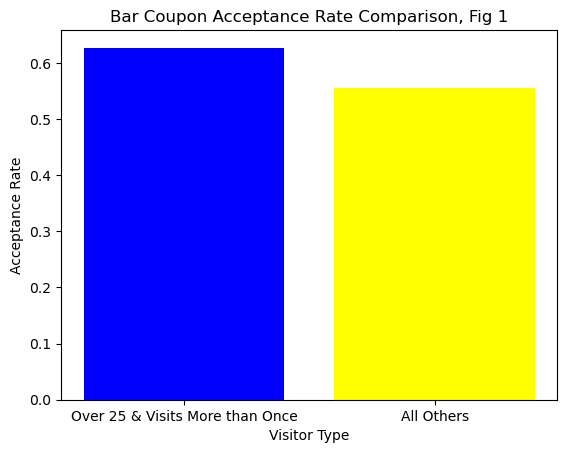

In [175]:
#Plot the acceptance rates between drivers who go to a bar more than once a month and are over the age of 25 to the all others
plt.bar(['Over 25 & Visits More than Once', 'All Others'], [DO25MTOAccRate, AOAccRate], color = ['blue', 'yellow'])
plt.xlabel('Visitor Type')
plt.ylabel('Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison, Fig 1')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [168]:
#Define the two groups
MoreThanOnceNoKidNotAgriculture = data[(data['Bar'].isin(['4~8', 'gt8', '1~3'])) &
                                      (data['passanger'] != 'Kid(s)') &
                                      (~data['occupation'].isin(['Farming Fishing & Forestry']))]
AllOthers_1 = data[~(data['Bar'].isin(['4~8', 'gt8', '1~3'])) &
                                      (data['passanger'] != 'Kid(s)') &
                                      (~data['occupation'].isin(['Farming Fishing & Forestry']))]

In [170]:
#Calculate the Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid
MTONKNAAccRate = MoreThanOnceNoKidNotAgriculture['Y'].mean()
MTONKNAAccRate

0.625

In [172]:
#Calculate the Acceptance rate of all other drivers
AO1AccRate = AllOthers_1['Y'].mean()
AO1AccRate

0.5521992580816111

Text(0.5, 1.0, 'Bar Coupon Acceptance Rate Comparison, Fig 2')

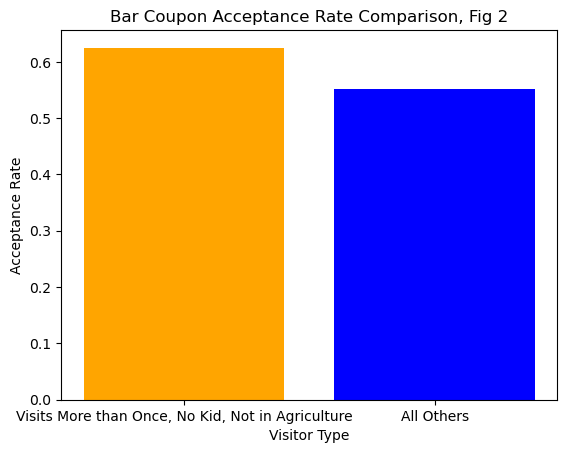

In [174]:
#Plot the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid 
   #and had occupations other than farming, fishing, or forestry
plt.bar(['Visits More than Once, No Kid, Not in Agriculture' , 'All Others'], [MTONKNAAccRate, AO1AccRate], color = ['orange', 'blue'])
plt.xlabel('Visitor Type')
plt.ylabel('Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison, Fig 2')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [183]:
#Define the 3 groups as listed above
Group6_1 = data[(data['Bar'].isin(['4~8', 'gt8', '1~3'])) &
                (data['passanger'] != 'Kid(s)') &
                (data['maritalStatus'] != 'Widowed')]
Group6_2 = data[(data['Bar'].isin(['4~8', 'gt8', '1~3'])) &
                (data['age'] < 30)]
Group6_3 = data[(data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
                (data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))]

In [184]:
# Combine the three groups using OR condition
CombinedGroup = pd.concat([Group6_1, Group6_2, Group6_3]).drop_duplicates()

# Filter for all other drivers
AllOthersGroup = data[~data.index.isin(CombinedGroup.index)]

In [187]:
#Calculate the acceptance rate of the combined group
CGAccRate = CombinedGroup['Y'].mean()
CGAccRate

0.6061034761519806

In [188]:
#Calculate the acceptance rate of the rest
AOGAccRate = AllOthersGroup['Y'].mean()
AOGAccRate

0.5438227457579582

Text(0.5, 1.0, 'Bar Coupon Acceptance Rate Comparison, Fig 3')

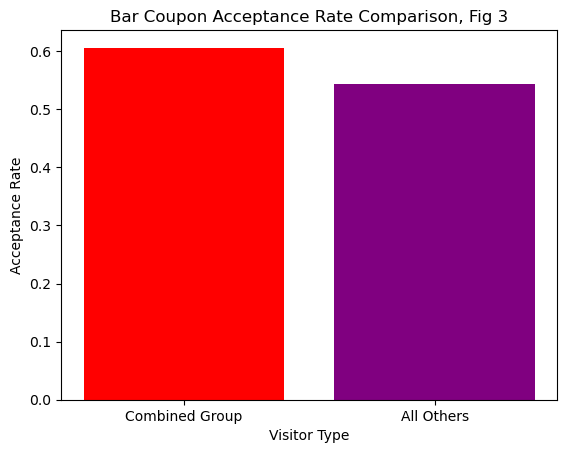

In [189]:
#Plot the acceptance rate
plt.bar(['Combined Group' , 'All Others'], [CGAccRate, AOGAccRate], color = ['red', 'purple'])
plt.xlabel('Visitor Type')
plt.ylabel('Acceptance Rate')
plt.title('Bar Coupon Acceptance Rate Comparison, Fig 3')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons

Based on these observations, several correlations can be concluded. 
1. Those who frequent the bar more often are more likely to accept bar coupons
2. Those who are between 25 and 30 who visit the bar at least once are more likely to accept bar coupons compared to any other demographic. This could indicate that younger individuals are more likely to accept coupons from bars.
3. Those who drive with passengers who are not kids are more likely to accept the bar coupon than drivers with kids.
4. Those who drive who are not widowed have a higher likelihood of accepting bar coupons.
5. Those who go to cheap restaurants more than 4 times a month and have an income less than 50,000 are more likely to accept bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  